# 0.2 - Feature Engineering & EDA

**Actions**: This notebook will examine aspects of the dataset, engineer features from existing ones, and perform a perliminary analysis on the dataset.

This notebook will accomplish the following tasks:

- Rename feature names with whitespace-free identifiers.
- `List Price`
    - Perform EDA on the `List Price` feature.
    - Obtain a histogram of the list price distribution across all records.
    - Use binned ranges to determine response categories.
    - Add `Price` feature with the labelled list price category.
- `Sales Price`
    - Verify that `Sales Price` <= `List Price` for each and every record in the dataset.
    - Rows where this assumption does not hold will be dropped.
    - If on sale, a `1` for `On Sale`. Otherwise sets a `0`.
- `Product Name`
    - Determine if any cleaning needs to occur at this stage.
    - Generate a wordcloud visualization.
    - Describe the distribution of words.
- `Product Description`
    - Remove the repeated disclaimer.
    - Generate a wordcloud visualization.
    - Describe the distribution of words.
- `Primary Category`
    - Engineer feature from the `Category` field. Pulls first category from series.
    - Generate a wordcloud visualization.
    - Describe the distribution of words.
- `Keywords`
    - Engineer feature from the `Category` field. Pulls all categories from series.
    - Generate a wordcloud visualization.
    - Describe the distribution of words.

**Dependencies**: This notebook depends on the `data/interim/ecommerce_data-cleaned-0.1.csv` data file.

**Targets**: This notebook outputs several interim data files:

- `data/interim/ecommerce_data-cleaned-0.2.1.csv`
- `data/interim/ecommerce_data-cleaned-0.2.2.csv`
- `data/interim/ecommerce_data-cleaned-0.2.3.csv`
- `data/interim/ecommerce_data-cleaned-0.2.4.csv`
- `data/interim/ecommerce_data-cleaned-0.2.5.csv`
- `data/interim/ecommerce_data-cleaned-0.2.6.csv`
- `data/interim/ecommerce_data-cleaned-0.2.7.csv`

In [1]:
# Import necessary libraries
import os
import pandas as pd

In [2]:
# Setup constants.
DATA_DIR = "./../data/interim/"
BASENAME = "ecommerce_data-cleaned-0.2"
EXT = "csv"

def determine_filepath(number):
    filename = "{v1}.{v2}.{v3}".format(v1=BASENAME, v2=str(number), v3=EXT)
    return os.path.join(DATA_DIR, filename)

def save_interim(df, step):
    print("Saving dataframe {v1} to {v2}.".format(v1=df.shape, v2=FILEPATHS[step]))
    df.to_csv(FILEPATHS[step])
    print("File saved.")

# Show filepath constants.
FILEPATHS = {
    '0.2.1': determine_filepath(1),
    '0.2.2': determine_filepath(2),
    '0.2.3': determine_filepath(3),
    '0.2.4': determine_filepath(4),
    '0.2.5': determine_filepath(5),
    '0.2.6': determine_filepath(6),
    '0.2.7': determine_filepath(7),
}

# Display generated filepath constants.
for path in FILEPATHS:
    print(FILEPATHS[path])

./../data/interim/ecommerce_data-cleaned-0.2.1.csv
./../data/interim/ecommerce_data-cleaned-0.2.2.csv
./../data/interim/ecommerce_data-cleaned-0.2.3.csv
./../data/interim/ecommerce_data-cleaned-0.2.4.csv
./../data/interim/ecommerce_data-cleaned-0.2.5.csv
./../data/interim/ecommerce_data-cleaned-0.2.6.csv
./../data/interim/ecommerce_data-cleaned-0.2.7.csv


In [3]:
# Read the dataset into a pandas dataframe.
data_df = pd.read_csv("./../data/interim/ecommerce_data-cleaned-0.1.csv",
                        index_col=0,
                        parse_dates=["Crawl Timestamp"])
print('Loaded data {v1}.'.format(v1=data_df.shape))
data_df.info()
data_df.head()

Loaded data (29604, 7).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29604 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Crawl Timestamp  29604 non-null  datetime64[ns, UTC]
 1   Product Name     29604 non-null  object             
 2   Description      29552 non-null  object             
 3   List Price       29604 non-null  float64            
 4   Sale Price       29604 non-null  float64            
 5   Brand            29045 non-null  object             
 6   Category         29588 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 1.8+ MB


,Crawl Timestamp,Product Name,Description,List Price,Sale Price,Brand,Category
0,2019-12-18 10:20:52+00:00,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,31.93,31.93,La Costeï¿½ï¿½a,"Food | Meal Solutions, Grains & Pasta | Canned..."
1,2019-12-18 17:21:48+00:00,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,10.48,10.48,Equate,Health | Equate | Equate Allergy | Equate Sinu...
2,2019-12-18 17:46:41+00:00,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,10.99,10.99,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...
3,2019-12-18 22:14:22+00:00,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,38.59,38.59,lowrider,Sports & Outdoors | Bikes | Bike Accessories |...
4,2019-12-18 06:56:02+00:00,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,5.81,5.81,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...


## 0.2.1 - Fieldname Preprocessing

Feature names should be renamed so that they can be referenced consistently. Additionally, they shoul be ordered intuitively.

In [4]:
# Prepare map for field names.
fieldnames = {
    'Product Name': 'name',
    'Description': 'description',
    'List Price': 'price_raw',
    'Sale Price': 'discount_raw',
    'Brand': 'brand',
    'Category': 'category_raw',
}

# Apply mapping.
df_1 = data_df.rename(fieldnames, axis=1)
print("Renamed columns to {v1}".format(v1=df_1.columns))

# Reorder columns.
features = [
    'brand',
    'name',
    'description',
    'category_raw',
    'price_raw',
    'discount_raw',
]

# Apply new order.
df_1 = df_1[features]
print("Reordered columns to {v1}".format(v1=df_1.columns))
df_1.info()
df_1.head()

Renamed columns to Index(['Crawl Timestamp', 'name', 'description', 'price_raw', 'discount_raw',
       'brand', 'category_raw'],
      dtype='object')
Reordered columns to Index(['brand', 'name', 'description', 'category_raw', 'price_raw',
       'discount_raw'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29604 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         29045 non-null  object 
 1   name          29604 non-null  object 
 2   description   29552 non-null  object 
 3   category_raw  29588 non-null  object 
 4   price_raw     29604 non-null  float64
 5   discount_raw  29604 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.6+ MB


,brand,name,description,category_raw,price_raw,discount_raw
0,La Costeï¿½ï¿½a,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",31.93,31.93
1,Equate,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Health | Equate | Equate Allergy | Equate Sinu...,10.48,10.48
2,AduroSmart ERIA,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,Electronics | Smart Home | Smart Energy and Li...,10.99,10.99
3,lowrider,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Accessories |...,38.59,38.59
4,Anself,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Baby | Feeding | Sippy Cups: Alternatives to P...,5.81,5.81


In [5]:
# Save the interim data file.
save_interim(df_1, '0.2.1')

Saving dataframe (29604, 6) to ./../data/interim/ecommerce_data-cleaned-0.2.1.csv.
File saved.


## 0.2.2 - `List Price` EDA

- Perform EDA on the `List Price` feature.
- Obtain a histogram of the list price distribution across all records.
- Use binned ranges to determine response categories.
- Add `Price` feature with the labelled list price category.

In [21]:
# Import plotting library.
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')

In [7]:
list_price = df_1['price_raw']
list_price.describe()

count    29604.000000
mean        72.760576
std        319.713464
min          0.100000
25%         11.120000
50%         21.470000
75%         46.020000
max      13280.810000
Name: price_raw, dtype: float64

In [8]:
num_na = list_price.isna().sum()
print("There are {v1} records with missing list prices.".format(v1=num_na))

There are 0 records with missing list prices.


In [9]:
Q0 = list_price.quantile(0.00)
Q1 = list_price.quantile(0.25)
Q2 = list_price.quantile(0.50)
Q3 = list_price.quantile(0.75)
Q4 = list_price.quantile(1.00)
IQR = Q3 - Q1
Q34 = Q4 -Q3
print("Quantiles: 0% [{v1}], 25% [{v2}], 50% [{v3}], 75% [{v4}], 100% [{v5}]".format(v1=Q0, v2=Q1, v3=Q2, v4=Q3, v5=Q4))
print("Inter-quartile Range: {v1}".format(v1=IQR))
print("Distance between Q4 and Q3: {v1}".format(v1=Q34))

Quantiles: 0% [0.1], 25% [11.12], 50% [21.47], 75% [46.02], 100% [13280.81]
Inter-quartile Range: 34.900000000000006
Distance between Q4 and Q3: 13234.789999999999


The median price is `$21.47`, but there is a clear outlier in the maximum price at `$13280.81`. The distance between the 75% quartile and the max is `$13234.79` - several orders of magnitude larger than the IQR of `$34.90`.

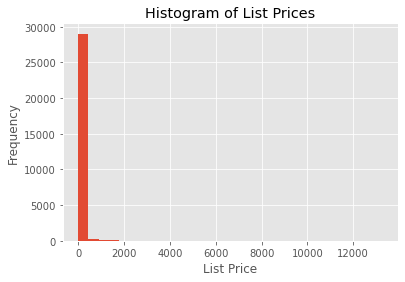

In [10]:
fig, ax = plt.subplots(1, 1)
ax.hist(list_price, bins=30)
ax.set_title("Histogram of List Prices")
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

We can see that an overwhelming amount of the data is roughly between `$0.00` and `$2000.00`. We can verify this with a box plot.

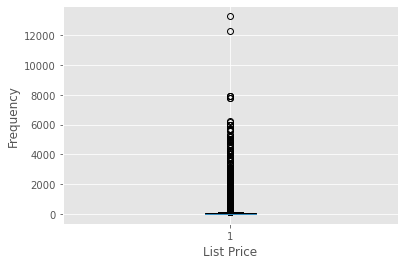

In [11]:
fig, ax = plt.subplots(1, 1)
ax.boxplot(list_price)
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

In [ ]:
def summary_above(s, value):
    num_remaining = s[s > value].shape[0]
    print("There are {v1} products with prices greater than {v2}.".format(v1=num_remaining, v2=value))
    
def summary_below(s, value):
    num_remaining = s[s <= value].shape[0]
    print("There are {v1} products with prices less than or equal to {v2}.".format(v1=num_remaining, v2=value))
    
summary_below(list_price, list_price.quantile(0.25))
summary_above(list_price, list_price.quantile(0.75))
summary_above(list_price, 2000)
summary_above(list_price, 10000)

There are 7406 products with prices less than or equal to 11.12.
There are 7400 products with prices greater than 46.02.
There are 157 products with prices greater than 2000.
There are 2 products with prices greater than 10000.


In [43]:
# Filter out the outliers.
mask = list_price > 500
num_outliers = df_1[mask].shape[0]
print("Removing {v1} products from the dataset.".format(v1=num_outliers))

# Show outliers.
df_1[mask]

Removing 501 products from the dataset.


,brand,name,description,category_raw,price_raw,discount_raw
25,Cimarron,Cimarron 50x12x10 #24 Batting Cage & Complete ...,We aim to show you accurate product informati...,Sports & Outdoors | Sports | Baseball Gear & E...,1203.47,1203.47
35,Pogo Bounce House,Pogo 40 Inflatable Obstacle Course Bounce Hous...,We aim to show you accurate product informati...,Toys | Outdoor Play | Bounce Houses | Bounce H...,3999.99,3999.99
74,RAVE Sports,Rave Sports Aqua Slide Northwoods,We aim to show you accurate product informati...,Sports & Outdoors | Outdoor Sports | Water Spo...,799.99,799.99
77,First Team,First Team Storm Pro Steel-Glass Portable Bask...,We aim to show you accurate product informati...,Sports & Outdoors | Sports | Basketball | Port...,5700.00,5700.00
149,Pogo Bounce House,Pogo Rainbow Crossover Kids Jumper Inflatable ...,We aim to show you accurate product informati...,Toys | Outdoor Play | Bounce Houses | Indoor B...,999.99,999.99
...,...,...,...,...,...,...
29546,Athletic Connection,Champion Half Rack with Platform,We aim to show you accurate product informati...,Sports & Outdoors | Exercise & Fitness | Stren...,1785.54,1785.54
29547,Jaypro Sports,Jaypro Sports BLCH-421 4 Row 21 ft. Standard B...,We aim to show you accurate product informati...,Sports & Outdoors | Sports | Baseball Gear & E...,2174.99,2174.99
29758,First Team,First Team RollaJam Select Steel-Acrylic Porta...,We aim to show you accurate product informati...,Sports & Outdoors | Sports | Basketball | Port...,2414.00,2414.00
29877,Minn Kota,"The Amazing Quality ""Minn Kota Riptide SF 112/...",We aim to show you accurate product informati...,Sports & Outdoors | Outdoor Sports | Boats & M...,1775.99,1775.99


These seem like very atypical products. We think we'll get better results by removing this brand (for now) to determine accurate list price categories.

In [44]:
# Display the filtered results.
df_2 = df_1[~mask]
print("Applied filtering mask. Dataset shape: {v1}.".format(v1=df_2.shape))
df_2.head()

Applied filtering mask. Dataset shape: (29103, 6).


,brand,name,description,category_raw,price_raw,discount_raw
0,La Costeï¿½ï¿½a,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",31.93,31.93
1,Equate,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Health | Equate | Equate Allergy | Equate Sinu...,10.48,10.48
2,AduroSmart ERIA,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,Electronics | Smart Home | Smart Energy and Li...,10.99,10.99
3,lowrider,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Accessories |...,38.59,38.59
4,Anself,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Baby | Feeding | Sippy Cups: Alternatives to P...,5.81,5.81


In [45]:
# Filtered dataset
list_price2 = df_2['price_raw']
list_price2.describe()

count    29103.000000
mean        42.735288
std         62.936122
min          0.100000
25%         10.990000
50%         20.950000
75%         44.000000
max        500.000000
Name: price_raw, dtype: float64

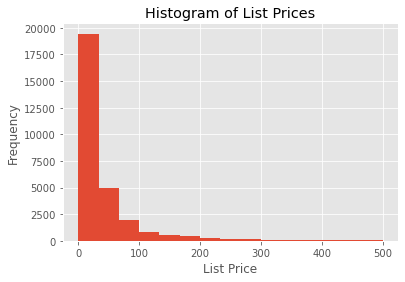

In [47]:
fig, ax = plt.subplots(1, 1)
ax.hist(list_price2, bins=15)
ax.set_title("Histogram of List Prices")
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

A great majority of the price differences are between `$0` and `$200`. This is where we should focus our categories.

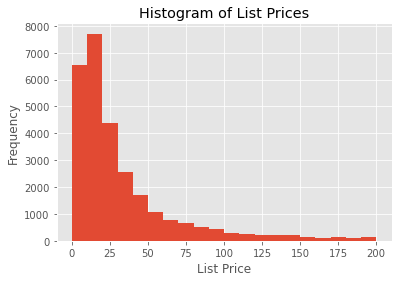

In [49]:
fig, ax = plt.subplots(1, 1)
ax.hist(list_price2, bins=20, range=(0, 200))
ax.set_title("Histogram of List Prices")
ax.set_xlabel("List Price")
ax.set_ylabel("Frequency")
plt.show()

In [108]:
# Get the 10 most frequent list prices (rounded).
n = 10
list_price2.round(1).value_counts().sort_values(ascending=False).index[:n].tolist()

[20.0, 10.0, 15.0, 13.0, 25.0, 12.0, 9.0, 30.0, 7.0, 8.0]

The top 10 most frequent list prices.

With consideration of the explored dataset, a good starting point is to consider the following 10 price ranges as possible classes for our data:

In [127]:
# Prepare categories.
def get_range_label(price):
    value = np.round(price, decimals=1)
    if value <= 10:
        return "(0.00, 10.00]"
    elif value > 10 and value <= 20:
        return "(10.00, 20.00]"
    elif value > 20 and value <= 25:
        return "(10.00, 25.00]"
    elif value > 25 and value <= 30:
        return "(25.00, 30.00]"
    elif value > 30 and value <= 35:
        return "(30.00, 35.00]"    
    elif value > 35 and value <= 40:
        return "(30.00, 40.00]"
    elif value > 40 and value <= 45:
        return "(40.00, 45.00]"
    elif value > 45 and value <= 50:
        return "(45.00, 50.00]"
    elif value > 50 and value <= 100:
        return "(50.00, 100.00]"
    else:
        return "(100.00+]"

# Example execution:
print(get_range_label(1.00))
print(get_range_label(13.00))
print(get_range_label(31.00))
print(get_range_label(13130.00))

(0.00, 10.00]
(10.00, 20.00]
(30.00, 35.00]
(100.00+]


In [129]:
PRICE_BINS = [0, 10, 20, 25, 30, 35, 40, 45, 50, 100]
pd.cut(df_1['price_raw'], PRICE_BINS, right=True)

0        (30, 35]
1        (10, 20]
2        (10, 20]
3        (35, 40]
4         (0, 10]
           ...   
29994    (45, 50]
29996    (30, 35]
29997     (0, 10]
29998    (45, 50]
29999     (0, 10]
Name: price_raw, Length: 29604, dtype: category
Categories (9, interval[int64, right]): [(0, 10] < (10, 20] < (20, 25] < (25, 30] ... (35, 40] < (40, 45] < (45, 50] < (50, 100]]

## 0.2.3 - `Sales Price` Validation

We want to ensure any discounted price is less than or equal to the list price.

In [72]:
# Import math library.
import numpy as np

In [52]:
a = df_1['discount_raw']
b = df_1['price_raw']
a.describe(), b.describe()

(count    29604.000000
 mean        71.885462
 std        319.388609
 min          0.100000
 25%         10.990000
 50%         20.990000
 75%         45.232500
 max      13280.810000
 Name: discount_raw, dtype: float64,
 count    29604.000000
 mean        72.760576
 std        319.713464
 min          0.100000
 25%         11.120000
 50%         21.470000
 75%         46.020000
 max      13280.810000
 Name: price_raw, dtype: float64)

The above shows there are no negative values. There are slight differences between discount and list price (compare the medians).

In [84]:
df_check = df_1[['discount_raw', 'price_raw']][a < b]
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 10 to 29999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   discount_raw  1551 non-null   float64
 1   price_raw     1551 non-null   float64
dtypes: float64(2)
memory usage: 36.4 KB


No missing values. There's one discount price for every listed price.

In [85]:
# Filter discount states
mask1 = (df_1.loc[:, 'discount_raw'] < df_1.loc[:, 'price_raw'])
num_discounted = df_1[mask1].shape[0]
print("There are {v1} records that are discounted.".format(v1=num_discounted))

mask2 = (df_1.loc[:, 'discount_raw'].round(1) == df_1.loc[:, 'price_raw'].round(1))
num_same = df_1[mask2].shape[0]
print("There are {v1} records that are not discounted.".format(v1=num_same))

mask3 = (df_1.loc[:, 'discount_raw'] > df_1.loc[:, 'price_raw'])
num_error = df_1[mask3].shape[0]
print("There are {v1} records that have an error state.".format(v1=num_error))

There are 1551 records that are discounted.
There are 28051 records that are not discounted.
There are 2 records that have an error state.


In [88]:
# Remove records with error state.
df_3 = df_1[~mask3]
num_removed = df_1[mask3].shape[0]
print("{v1} record(s) have been removed for an error discount greater than the list price. Result shape: {v2}.".format(v1=num_removed, v2=df_3.shape))
df_3.head()

2 record(s) have been removed for an error discount greater than the list price. Result shape: (29602, 6).


,brand,name,description,category_raw,price_raw,discount_raw
0,La Costeï¿½ï¿½a,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,"Food | Meal Solutions, Grains & Pasta | Canned...",31.93,31.93
1,Equate,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Health | Equate | Equate Allergy | Equate Sinu...,10.48,10.48
2,AduroSmart ERIA,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,Electronics | Smart Home | Smart Energy and Li...,10.99,10.99
3,lowrider,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,Sports & Outdoors | Bikes | Bike Accessories |...,38.59,38.59
4,Anself,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Baby | Feeding | Sippy Cups: Alternatives to P...,5.81,5.81


In [89]:
# Save as interim file.
save_interim(df_3, '0.2.3')

Saving dataframe (29602, 6) to ./../data/interim/ecommerce_data-cleaned-0.2.3.csv.
File saved.


## 0.2.4 - `Product Name` Cleaning

## 0.2.5 - `Product Description` EDA

## 0.2.6 - `Primary Category` Feature Engineering

## 0.2.7 - `Keywords` Feature Engineering